<a href="https://colab.research.google.com/github/patelchintan18018/The-Sparks-Foundation/blob/main/Exploratory_data_analysis_with_python_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets --upgrade --quiet

**Selecting a dataset from Kaggle** 

In [3]:
import opendatasets as od
download_url="https://www.kaggle.com/sobhanmoosavi/us-accidents"
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: patelchintan18
Your Kaggle Key: ··········


100%|██████████| 117M/117M [00:00<00:00, 135MB/s]


**Loading dataset into pandas**

In [5]:
import pandas as pd

data_filename="./us-accidents/US_Accidents_Dec20_updated.csv"
df=pd.read_csv(data_filename)

**Information about dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1516064 entries, 0 to 1516063
Data columns (total 47 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   ID                     1516064 non-null  object 
 1   Severity               1516064 non-null  int64  
 2   Start_Time             1516064 non-null  object 
 3   End_Time               1516064 non-null  object 
 4   Start_Lat              1516064 non-null  float64
 5   Start_Lng              1516064 non-null  float64
 6   End_Lat                1516064 non-null  float64
 7   End_Lng                1516064 non-null  float64
 8   Distance(mi)           1516064 non-null  float64
 9   Description            1516064 non-null  object 
 10  Number                 469969 non-null   float64
 11  Street                 1516064 non-null  object 
 12  Side                   1516064 non-null  object 
 13  City                   1515981 non-null  object 
 14  County            

**Mathematical terms w.r.t columns**

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


**Information about columns**

In [11]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

**Cleaning of data (Removing NULL values)**

Step 1: identifing which column has most number of missing values

In [14]:
missing_df= df.isna().sum().sort_values(ascending=False)
missing_df

Number                   1046095
Precipitation(in)         510549
Wind_Chill(F)             449316
Wind_Speed(mph)           128862
Humidity(%)                45509
Visibility(mi)             44211
Weather_Condition          44007
Temperature(F)             43033
Wind_Direction             41858
Pressure(in)               36274
Weather_Timestamp          30264
Airport_Code                4248
Timezone                    2302
Zipcode                      935
City                          83
Nautical_Twilight             83
Astronomical_Twilight         83
Civil_Twilight                83
Sunrise_Sunset                83
Amenity                        0
Bump                           0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Street    

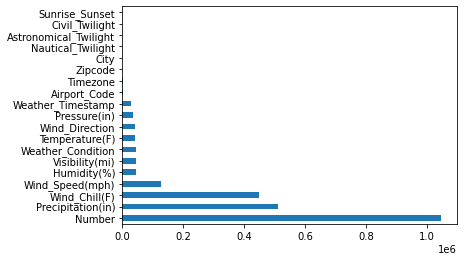

In [18]:
import matplotlib.pyplot as plt

missing=missing_df[missing_df!=0]
missing.plot(kind='barh')


Step 2: Deleting columns which contains more NULL vales

In [20]:
df.drop(['Number','Precipitation(in)','Wind_Chill(F)','Wind_Speed(mph)'],axis=1,inplace=True)

Step 3: deleting columns which is contain NULL values and duplicated rows

In [73]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


**Analysis on basis of cities in US**

Data includes how many differnt cities of US

In [27]:
df.City
df.City.unique()
len(df.City.unique())

10412

Number of accidents occurs in a particular city

In [28]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

Los Angeles      39012
Miami            34563
Charlotte        22087
Houston          20516
Dallas           19286
                 ...  
Cleona               1
Trilla               1
Dalhart              1
Chestnutridge        1
Edgeley              1
Name: City, Length: 10412, dtype: int64

Top 20 city with highest nuumber of accidents

In [80]:
cities_by_accidents[0:20]

Los Angeles       39012
Miami             34563
Charlotte         22087
Houston           20516
Dallas            19286
Sacramento        18265
Orlando           15927
Portland          14740
San Diego         13778
Minneapolis       12607
Atlanta           11774
Chicago           11477
Saint Paul         9821
Phoenix            9774
Raleigh            9453
San Jose           9274
Nashville          8321
Riverside          8085
Richmond           7924
Salt Lake City     7698
Name: City, dtype: int64

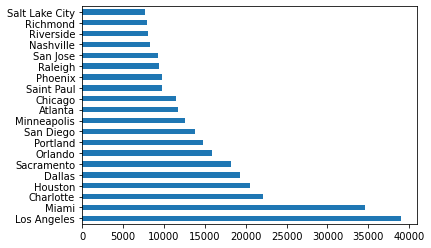

In [29]:
cities_by_accidents[0:20].plot(kind='barh')

**Analysis on basis of Timestamp**

In [30]:
df.Start_Time=pd.to_datetime(df.Start_Time)
df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

**Analysis according to years**

1.Accidents occurs in year 2016

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


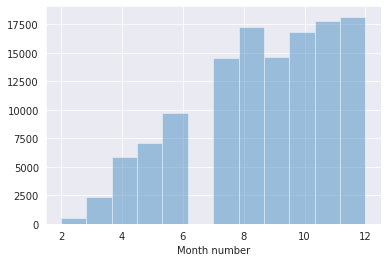

In [74]:
import seaborn as sns

df_2016=df[df.Start_Time.dt.year==2016]
sns.set_style('darkgrid')
sns.distplot(df_2016.Start_Time.dt.month,bins=12,kde=False,axlabel='Month number')


2. Accidents occurs in year 2017

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


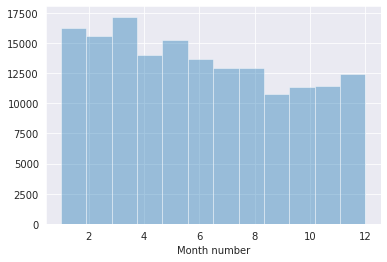

In [76]:
df_2017=df[df.Start_Time.dt.year==2017]
sns.set_style('darkgrid')
sns.distplot(df_2017.Start_Time.dt.month,bins=12,kde=False,axlabel='Month number')

3. Accidents occurs in year 2018

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


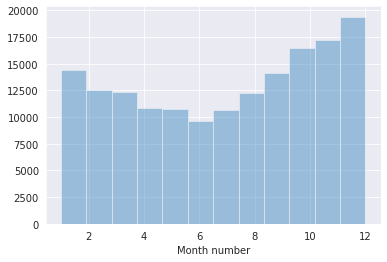

In [77]:
df_2018=df[df.Start_Time.dt.year==2018]
sns.set_style('darkgrid')
sns.distplot(df_2018.Start_Time.dt.month,bins=12,kde=False,axlabel='Month number')

4. Accidents occurs in year 2019

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


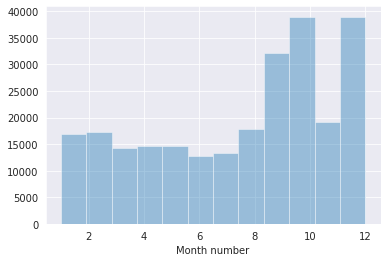

In [78]:
df_2019=df[df.Start_Time.dt.year==2019]
sns.set_style('darkgrid')
sns.distplot(df_2019.Start_Time.dt.month,bins=12,kde=False,axlabel='Month number')

5. Accidents occurs according to monthwise (including all years)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


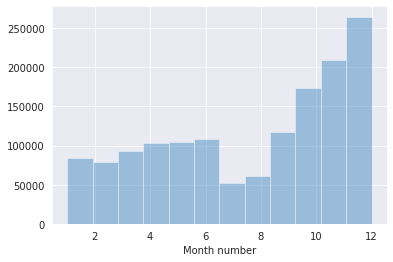

In [79]:
sns.set_style('darkgrid')
sns.distplot(df.Start_Time.dt.month,bins=12,kde=False,axlabel='Month number')

**Analysis on basis of days of week**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


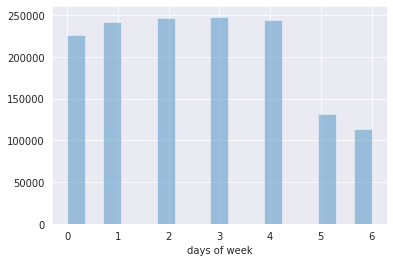

In [55]:
sns.set_style('darkgrid')
sns.distplot(df.Start_Time.dt.dayofweek,bins=17,kde=False,axlabel='days of week')

**Analysis on basis of Hours in a day**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


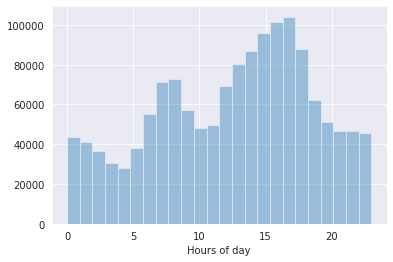

In [70]:
sns.set_style('darkgrid')
sns.distplot(df.Start_Time.dt.hour,bins=24,kde=False,axlabel='Hours of day')


**Analysis on basis of weekdays and weekends**

Accidnts on monday

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


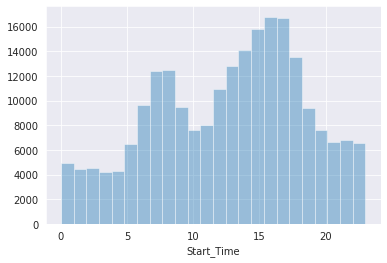

In [71]:
monday_df=df[df.Start_Time.dt.dayofweek==0]
sns.distplot(monday_df.Start_Time.dt.hour, bins=24, kde=False)

Accidents on sunday

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


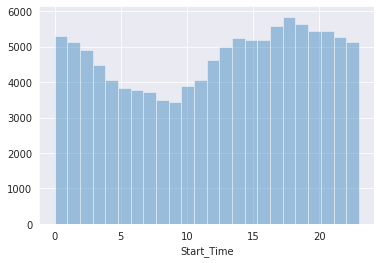

In [72]:
sunday_df=df[df.Start_Time.dt.dayofweek==6]
sns.distplot(sunday_df.Start_Time.dt.hour, bins=24, kde=False)

**Conclusions:**

- Columns name 'Number'  ,  'Precipitation(in)'  , 'Wind_Chill(F)'  and  'Wind_Speed(mph) are contain more number of NULL values.
-Dataset contain records of 10412 different cities of US.
-Top 20 cities with highest number of accidents 

Los Angeles    -   39012

Miami      -       34563

Charlotte   -      22087

Houston    -       20516

Dallas     -       19286

Sacramento   -     18265

Orlando      -     15927

Portland     -     14740

San Diego    -     13778

Minneapolis  -     12607

Atlanta     -      11774

Chicago      -     11477

Saint Paul  -       9821

Phoenix     -       9774

Raleigh     -       9453

San Jose     -      9274

Nashville   -       8321

Riverside    -      8085

Richmond    -       7924

Salt Lake City  -   7698 

- By observing graphs of accidents occurs yearwise , we can say that there are missing data of 2016 and 2019.
-More accidents occurs at the end of year.
-More accidents occurs in weeldays as compare to weekends
-Most number of accidents occurs between 3pm to 6pm.
